In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# to see the graph visuals
%matplotlib inline

In [75]:
df = pd.read_csv("bluetooth_connection_attempts_updated.csv")
df.columns

Index(['Connection_Type', 'Signal_Strength', 'Authentication_Method',
       'Data_Transferred', 'Connection_Duration', 'Connection_Status',
       'Anomaly_Flag'],
      dtype='object')

In [76]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 6].values
df

,Connection_Type,Signal_Strength,Authentication_Method,Data_Transferred,Connection_Duration,Connection_Status,Anomaly_Flag
0,Automatic,-15.784791,Biometric,662.922571,1052.398916,Failed,0
1,Automatic,-31.984580,Password,961.981945,314.181762,Successful,1
2,Automatic,-99.607647,Biometric,328.506766,2171.124622,Failed,0
3,Automatic,-25.338964,Password,38.027894,2853.367864,Successful,0
4,Automatic,-47.854192,NaN,756.314868,285.030719,Failed,0
...,...,...,...,...,...,...,...
995,Manual,-30.704152,NaN,738.680015,1989.106055,Successful,1
996,Manual,-52.736399,Password,418.745756,215.361831,Successful,1
997,Automatic,-95.861830,Biometric,450.535475,1563.103083,Successful,0
998,Automatic,-92.312534,Password,210.118835,1805.173793,Successful,0


In [77]:
df["Connection_Type"] = (df["Connection_Type"] == "Automatic").astype(int)
df["Authentication_Method"] = (df["Authentication_Method"] == "Biometric").astype(int)
df["Connection_Status"] = (df["Connection_Status"] == "Successful").astype(int)

<Axes: >

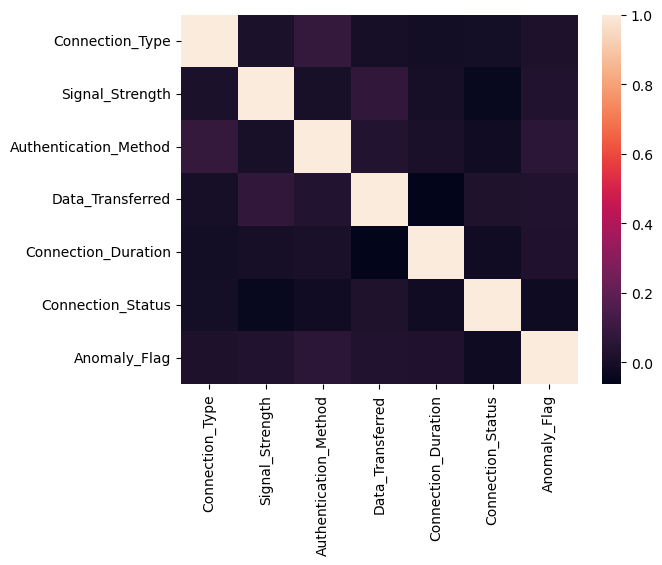

In [78]:
# Correlation matrix visualization
sns.heatmap(df.corr())

Anomaly_Flag
1    502
0    498
Name: count, dtype: int64

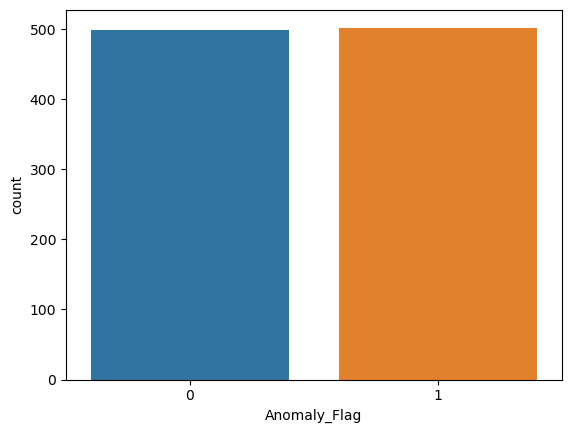

In [79]:
sns.countplot(data=df, x='Anomaly_Flag')
df['Anomaly_Flag'].value_counts()

In [80]:
df

,Connection_Type,Signal_Strength,Authentication_Method,Data_Transferred,Connection_Duration,Connection_Status,Anomaly_Flag
0,1,-15.784791,1,662.922571,1052.398916,0,0
1,1,-31.984580,0,961.981945,314.181762,1,1
2,1,-99.607647,1,328.506766,2171.124622,0,0
3,1,-25.338964,0,38.027894,2853.367864,1,0
4,1,-47.854192,0,756.314868,285.030719,0,0
...,...,...,...,...,...,...,...
995,0,-30.704152,0,738.680015,1989.106055,1,1
996,0,-52.736399,0,418.745756,215.361831,1,1
997,1,-95.861830,1,450.535475,1563.103083,1,0
998,1,-92.312534,0,210.118835,1805.173793,1,0


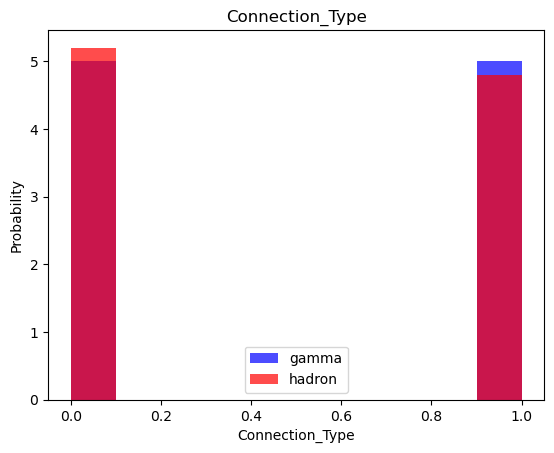

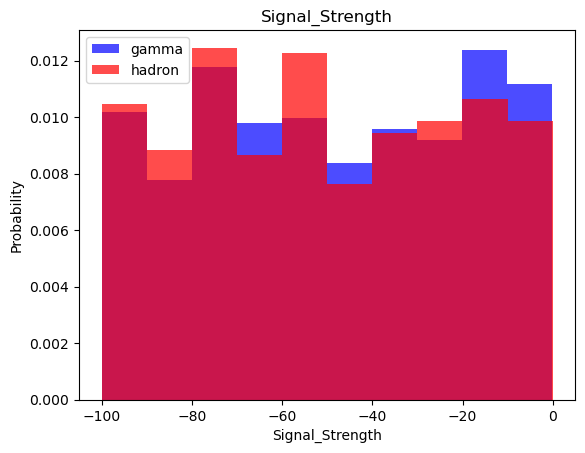

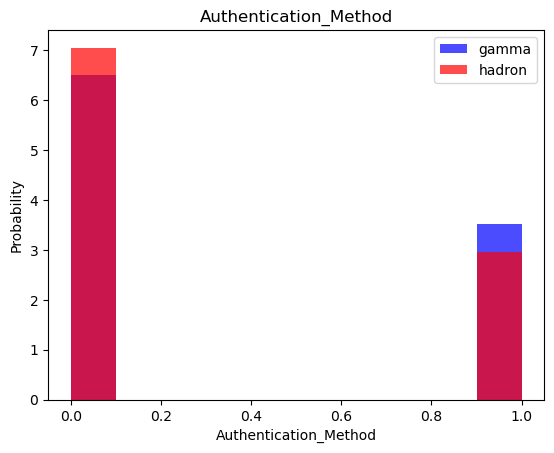

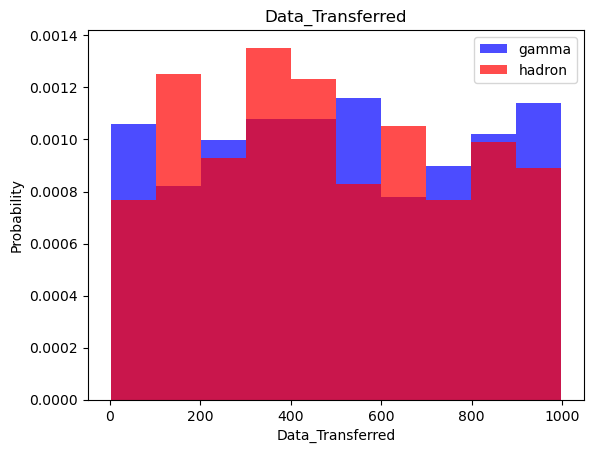

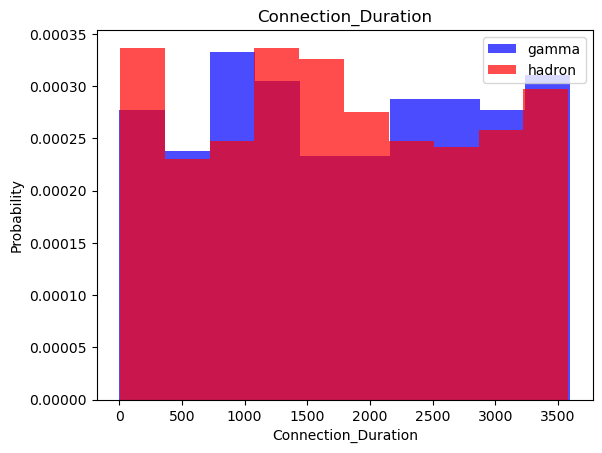

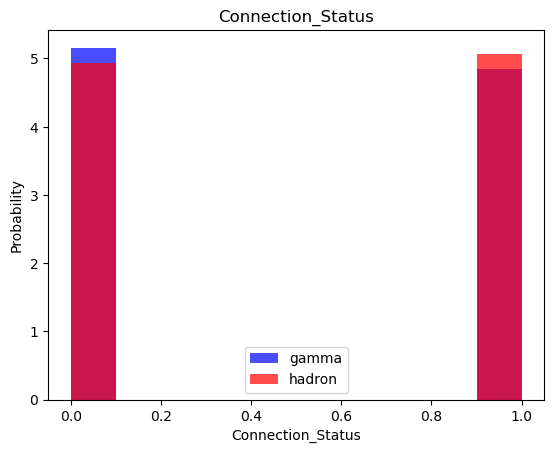

In [81]:
for label in df.columns[:-1]:
    plt.hist(df[df["Anomaly_Flag"] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["Anomaly_Flag"] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [58]:
# Regression Model
# Encoding categorical data

# from sklearn.preprocessing import oneHotEncoder, LabelEncoder
# labelencoder  = LabelEncoder()
# X[:, 3] = labelencoder.fit_transform(X[:, 3])
# onehotencoder = oneHotEncoder( categorical_features = [3] )
# X = onehotencoder.fit_transform().toarray()

In [82]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 6].values

In [115]:
# Avoid dummy data trap
# X = X[:, 1:]

In [116]:
# Split data into Train set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 0)

In [117]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [118]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([0.48451707, 0.48080788, 0.48444365, 0.48295071, 0.49450282,
       0.48523773, 0.51647054, 0.51365768, 0.50131162, 0.52886597,
       0.49407252, 0.48307925, 0.50560802, 0.48189699, 0.49091556,
       0.48412023, 0.5156026 , 0.52352847, 0.53456472, 0.4890529 ,
       0.48033203, 0.50479898, 0.50135544, 0.49223635, 0.47828812,
       0.50074331, 0.52921903, 0.51663332, 0.51253975, 0.48892317,
       0.49941885, 0.47787732, 0.5030627 , 0.48744116, 0.47215284,
       0.47106445, 0.48456953, 0.47142727, 0.48098115, 0.45665357,
       0.52729313, 0.46916269, 0.47931981, 0.48944657, 0.51717565,
       0.48652233, 0.49287474, 0.47624159, 0.50304176, 0.50529769,
       0.48968139, 0.50843092, 0.48142743, 0.53237447, 0.52275796,
       0.46829173, 0.52170378, 0.47919655, 0.49889036, 0.49904502,
       0.48505157, 0.47975954, 0.48152761, 0.49612999, 0.4777144 ,
       0.48184921, 0.51739189, 0.4777626 , 0.48790396, 0.49266359,
       0.48817909, 0.50268277, 0.49722358, 0.51703461, 0.51427

In [119]:
# Calculating the Coefficients
print(f"coefficient => {regressor.coef_}")
print(f"intercept => {regressor.intercept_}")

coefficient => [ 2.07055893e-02  3.51240110e-05  6.87957416e-06 -8.74442258e-03]
intercept => 0.46171748687328124


In [120]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.006715242662802212

In [121]:
# model not not a good one. Training failed using linear regression

# Logistic Regression

In [135]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 2)

In [136]:
print("Train model shape")
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print("============================")
print("Test model shape")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

Train model shape
X train: (770, 4)
y train: (770,)
Test model shape
X test: (230, 4)
y test: (230,)


In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [139]:
# Returns a numpy array
# Predict for  one observation
print(logistic_regression.predict(X_test[0].reshape(1, -1)))

[1]


In [140]:
logistic_regression.predict(X_test[0:10])

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [141]:
# Test dataset
predictions = logistic_regression.predict(X_test)

In [142]:
# How well is has the model performed
score = logistic_regression.score(X_test, y_test)
print(score)

0.4956521739130435


In [144]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[51 68]
 [48 63]]


Text(0.5, 1.0, 'Accuracy Score: 0.4956521739130435')

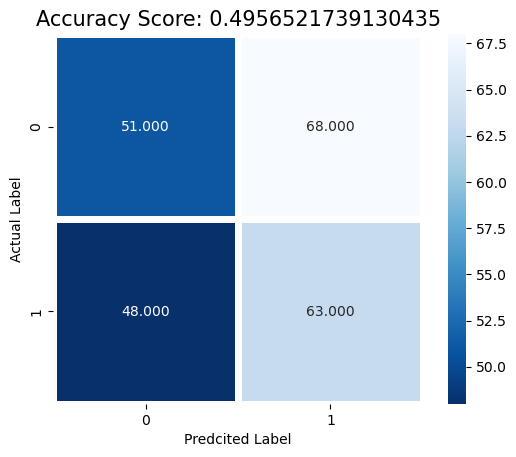

In [147]:
# plt.figure(figure(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=5, square=True, cmap="Blues_r");
plt.ylabel("Actual Label");
plt.xlabel("Predcited Label");
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)

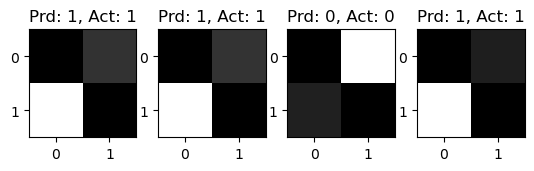

In [169]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index +=1

for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong],(2,2)), cmap=plt.cm.gray)
    plt.title("Prd: {}, Act: {}".format(predictions[wrong], y_test[wrong], fontsize=25))